In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [327]:
survey = pd.read_csv('train.csv')

survey.shape

(103904, 25)

In [328]:
### 103,904 observations

survey.shape


(103904, 25)

In [329]:
survey.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [330]:
survey.isnull().sum()


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [331]:
ratings = survey

ratings = ratings.iloc[:,8:22]


## Creating a new column with an overall score metric that summarizes all scores out of a score of 80
## 80 because there are 

survey['overall_rating'] = (ratings.sum(axis = 1)/80) *100


survey.tail(20)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating
103884,103884,6737,Female,Loyal Customer,19,Personal Travel,Eco,334,2,5,...,3,2,4,3,5,5,25,11.0,neutral or dissatisfied,61.25
103885,103885,122528,Male,Loyal Customer,40,Business travel,Business,500,4,4,...,3,3,3,5,3,4,47,26.0,satisfied,66.25
103886,103886,92323,Male,disloyal Customer,36,Business travel,Business,2556,3,3,...,5,4,5,5,5,5,2,13.0,neutral or dissatisfied,71.25
103887,103887,54253,Female,Loyal Customer,51,Personal Travel,Eco,1222,5,4,...,3,5,3,1,3,4,4,0.0,satisfied,63.75
103888,103888,115517,Male,disloyal Customer,38,Business travel,Business,447,2,2,...,3,3,5,5,5,3,0,0.0,neutral or dissatisfied,56.25
103889,103889,123802,Female,Loyal Customer,43,Business travel,Business,3885,5,5,...,3,3,3,4,3,3,0,0.0,satisfied,70.00
103890,103890,80087,Female,Loyal Customer,56,Business travel,Eco Plus,550,3,5,...,3,3,3,4,3,3,0,0.0,satisfied,63.75
103891,103891,83013,Male,Loyal Customer,54,Business travel,Business,1991,5,5,...,4,5,4,5,4,4,35,31.0,satisfied,77.50
103892,103892,46016,Female,disloyal Customer,37,Business travel,Business,596,3,3,...,1,1,3,1,4,3,110,121.0,neutral or dissatisfied,47.50
103893,103893,3397,Female,Loyal Customer,58,Business travel,Business,296,3,3,...,3,3,3,1,3,1,0,29.0,neutral or dissatisfied,50.00


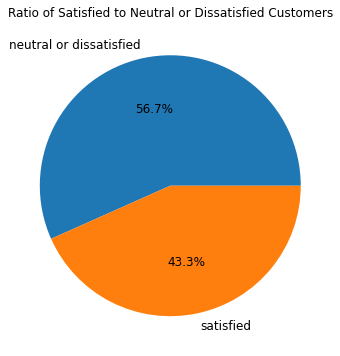

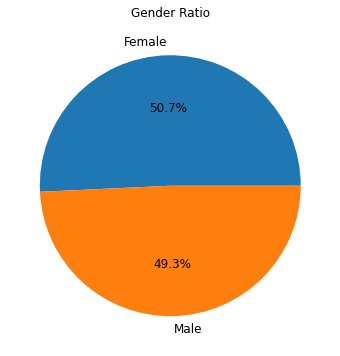

In [332]:
## Lets observe the ratio of satisfied to neutral or dissastified customers

s = survey.satisfaction.value_counts()

s.plot.pie(autopct = '%1.1f%%', textprops={'fontsize': 12}, figsize = (6,6))
plt.title('Ratio of Satisfied to Neutral or Dissatisfied Customers')
plt.ylabel('')
plt.show()


m = survey.Gender.value_counts()

m.plot.pie(autopct = '%1.1f%%', textprops={'fontsize': 12}, figsize = (6,6))
plt.title('Gender Ratio')
plt.ylabel('')
plt.show()

ValueError: Key figure.figsize: Expected 2 values, but there are 1 values in (12,)

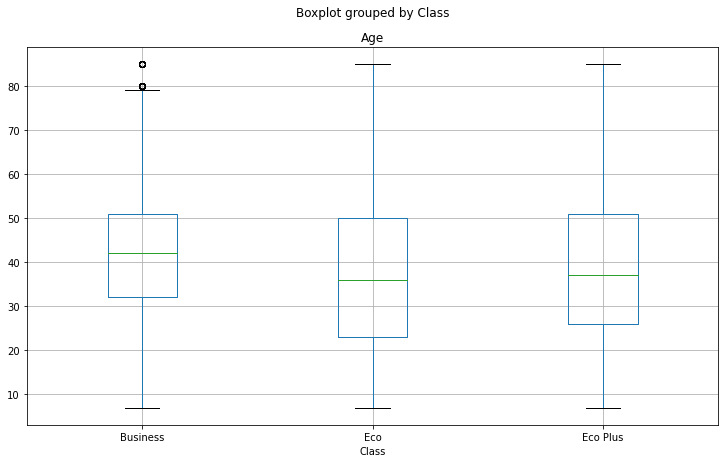

In [333]:
survey.boxplot(column ='Age', by = 'Class')
plt.rcParams['figure.figsize'] = (12,12)


plt.ylabel('Age', fontsize=20)
plt.title('Age Spread by Class', fontsize=20)

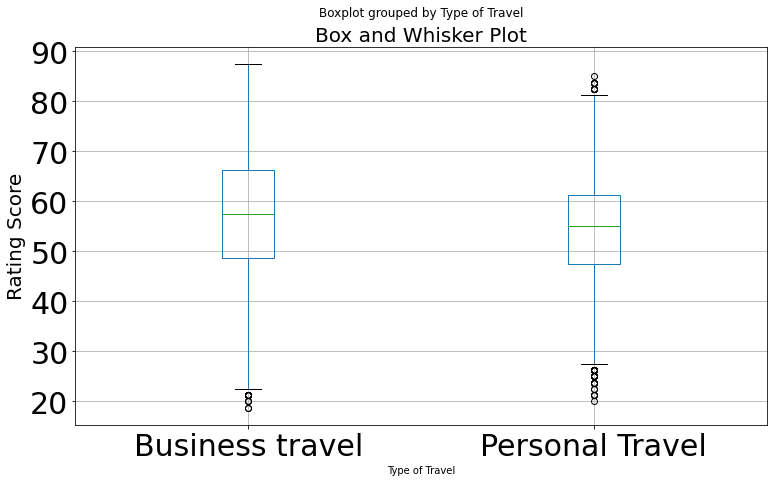

In [334]:
survey.boxplot(column ='overall_rating', by = 'Type of Travel')

plt.rcParams['figure.figsize'] = (50,20)


plt.ylabel('Rating Score', fontsize=20)
plt.title('Box and Whisker Plot', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


plt.show()

([<matplotlib.patches.Wedge at 0x1eb0329f340>,
 [Text(0.07600296413668083, 1.0973711994773867, 'Business'),
  Text(-0.32058604128300144, -1.052247399680557, 'Eco'),
  Text(1.0718831583365211, -0.24711635897796147, 'Eco Plus')],
 [Text(0.04145616225637136, 0.5985661088058473, '47.8%'),
  Text(-0.17486511342709168, -0.5739531270984856, '45.0%'),
  Text(0.5846635409108296, -0.13479074126070623, '7.2%')])

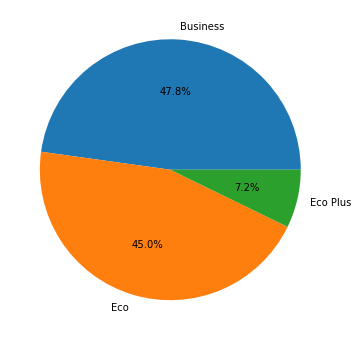

In [335]:
plt.figure(figsize=(6,6))
plt.pie(survey.Class.value_counts(), labels = survey.Class.value_counts().index, autopct='%1.1f%%')


In [336]:
survey.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,overall_rating
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,56.712675
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,11.582000
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.750000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,48.750000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,57.500000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,65.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,87.500000


In [337]:
#convert 'Gender' to binary

survey['Gender'] = survey['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

#create dummy variables for other categorical values


In [338]:
#creating a correlation matrix

correlation_matrix = survey.corr()

correlation_matrix.head(3)

,Unnamed: 0,id,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,overall_rating
Unnamed: 0,1.000000,0.002991,0.003978,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,...,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045,0.000647
id,0.002991,1.000000,-0.000606,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,...,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254,0.062753
Gender,0.003978,-0.000606,1.000000,0.008928,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000396,0.013445


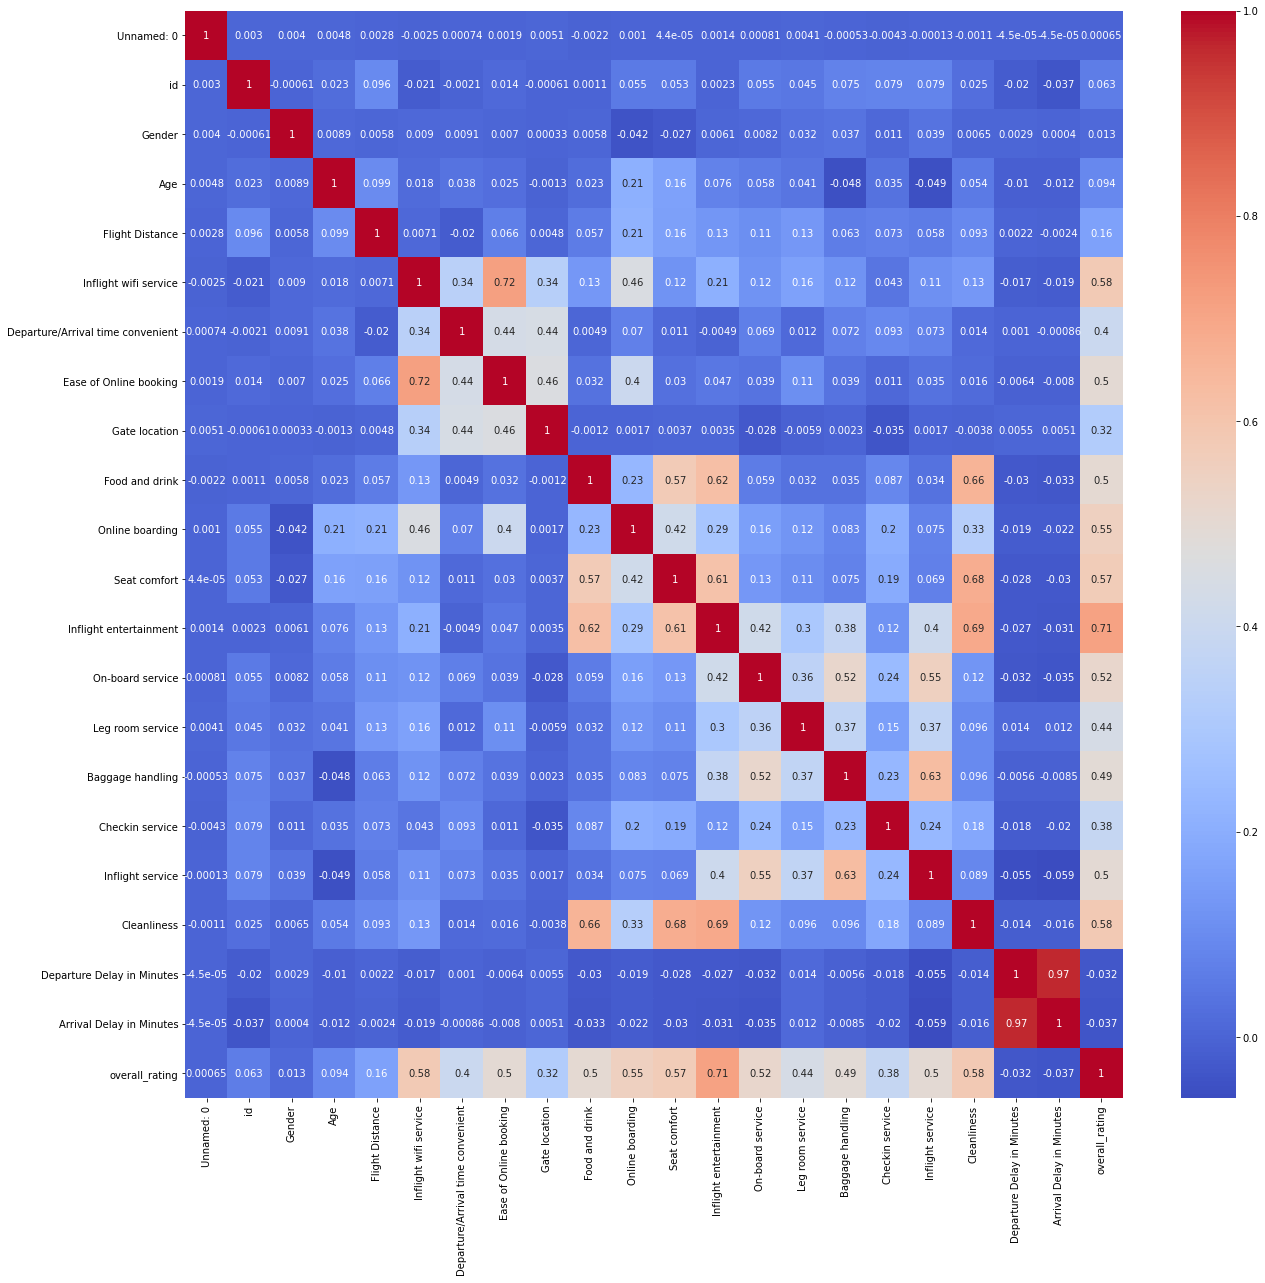

In [339]:
# Visualizaing correlation matrix with a heat map

plt.figure(figsize=(21, 8)).set_figheight(20)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [340]:
## Noticing strong correlation score of 0.97 between "Departure Delay in Minutes" and "Arrival Delay in Minutes"
## This is intuitive and makes sense

## "Inflight Wifi Service" and "Ease of Online Booking" have a score of 0.72 (Significant and Positive)

## "Inflight Entertainment" and "Overall Rating" have a score of 0.71 (Signficant and Positive) 




In [341]:
survey['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [342]:
survey.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating
0,0,70172,1,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,67.50
1,1,5047,1,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,40.00
2,2,110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,65.00
3,3,24026,0,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,52.50
4,4,119299,1,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,61.25


In [343]:

# Create a new DataFrame for features by dropping the target column
X = df.drop('overall_rating', axis=1)

# Create a new series for the target
y = df['overall_rating']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [344]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)



ValueError: could not convert string to float: 'neutral or dissatisfied'